In [36]:
import sys
sys.path.append('/Users/michal/PythonProjects/MOTIVE')
from simulation_parameters import *
from imports_file import *
from matplotlib.colors import LogNorm

# PSD 1D

### upload dataset

In [94]:
dst_path = os.path.join(data_path_psd1d, "psd1_test_1.nc")
dat_dst = Dataset(dst_path, 'r')
freq = dat_dst.variables['freq'][:]/4
psd = dat_dst.variables['psd'][:]
depths = dat_dst.variables['depths'][:]
dat_dst.close()

### plot psd

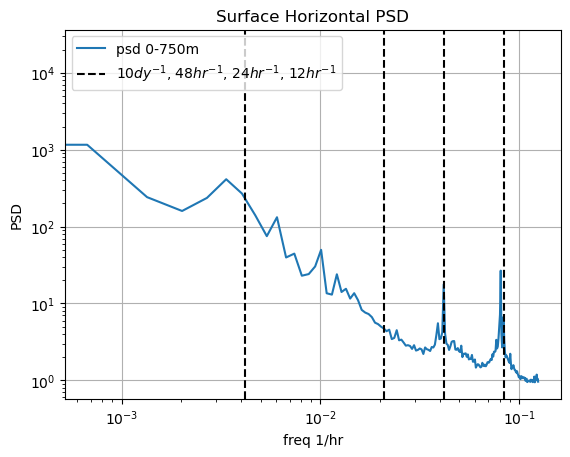

In [110]:
# plt.plot(freq, psd.mean(axis=0))
plt.plot(freq, psd.mean(axis=0))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('freq 1/hr')
plt.ylabel('PSD')
plt.title('Surface Horizontal PSD')
plt.grid(True)
plt.axvline(1/12,0,1e8, linestyle='--', c='k')
plt.axvline(1/24,0,1e8, linestyle='--', c='k')
plt.axvline(1/48,0,1e8, linestyle='--', c='k')
plt.axvline(1/24/10,0,1e8, linestyle='--', c='k')
plt.legend(['psd 0-750m', '10$dy^{-1}$, 48$hr^{-1}$, 24$hr^{-1}$, 12$hr^{-1}$'])
plt.show()

(41, 186) (41,) (186,)


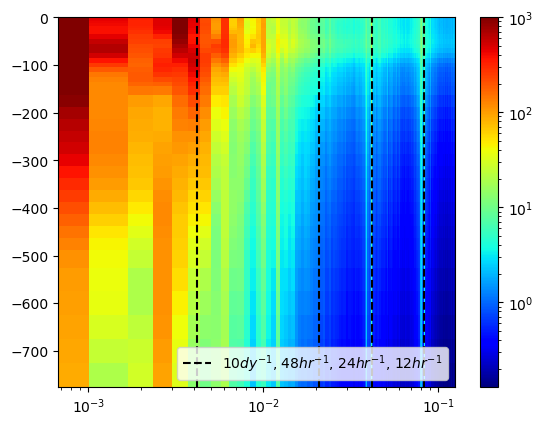

In [117]:
plt.close()
print(psd.shape, depths.shape, freq.shape)
norm = LogNorm(vmin=psd.min(), vmax=1e3)
plt.pcolormesh(freq,depths,psd, shading='nearest', norm=norm, cmap='jet')
plt.axvline(1/12,0,1e8, linestyle='--', c='k')
plt.axvline(1/24,0,1e8, linestyle='--', c='k')
plt.axvline(1/48,0,1e8, linestyle='--', c='k')
plt.axvline(1/24/10,0,1e8, linestyle='--', c='k')
plt.legend(['10$dy^{-1}$, 48$hr^{-1}$, 24$hr^{-1}$, 12$hr^{-1}$'],loc=4)
plt.xscale('log')
plt.xlim(freq[1],freq[-1])
plt.colorbar()
plt.show()

## PSD 2D

In [41]:
dst_path = os.path.join(data_path_psd, "psd2d_xi_223_1333_eta_137_137.nc")
dat_dst = Dataset(dst_path, 'r')
freq = dat_dst.variables['kh'][:]
psd = dat_dst.variables['psd'][:]
# freq = np.arange(len(psd[0,:]))
depths = dat_dst.variables['depths'][:]
dat_dst.close()

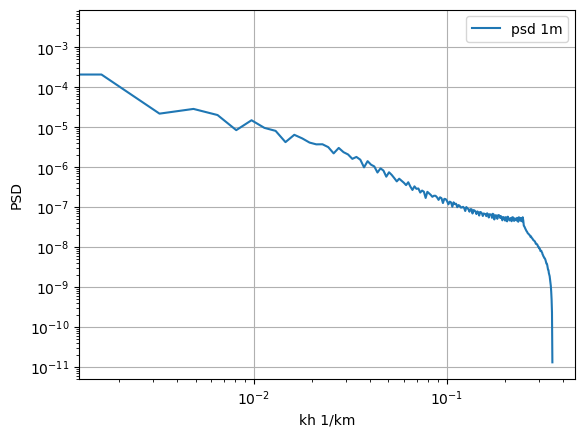

In [55]:
plt.plot(freq*1000, psd.mean(axis=0))
# plt.plot(freq, psd[1,:])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('kh 1/km')
plt.ylabel('PSD')
plt.grid(True)
plt.legend(['psd 1m', 'psd 40m', 'psd 200m'])
plt.show()

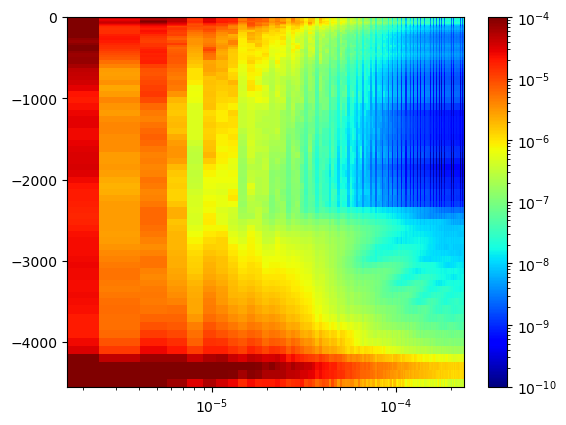

In [54]:
plt.close()
# print(psd.shape, depths.shape, freq.shape)
norm = LogNorm(vmin=1e-10, vmax=1e-4)
plt.pcolormesh(freq,depths,psd, shading='nearest', norm=norm, cmap='jet')

plt.xscale('log')
plt.xlim(freq[1],freq[-75])
# plt.ylim(-60,0)
plt.colorbar()
plt.show()

## PSD 3D

In [57]:
dst_path = os.path.join(data_path_psd, "psd3d_xi_612_944_eta_137_137.nc")
dat_dst = Dataset(dst_path, 'r')
kh = dat_dst.variables['kh'][:]
freq = dat_dst.variables['freq'][:]
psd = dat_dst.variables['psd'][:]
# freq = np.arange(len(psd[0,:]))
depths = dat_dst.variables['depths'][:]
dat_dst.close()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/michal/Data/MOTIVE/psd/psd3d_xi_223_1333_eta_137_137.nc'

In [56]:
plt.close()
# print(psd.shape, depths.shape, freq.shape)
norm = LogNorm(vmin=psd.min(), vmax=psd.max())
plt.pcolormesh(freq,kh,psd, shading='nearest', norm=norm, cmap='jet')

plt.xscale('log')
plt.yscale('log')
# plt.xlim(freq[1],freq[-75])
# plt.ylim(-60,0)
plt.colorbar()
plt.show()

NameError: name 'kh' is not defined